# Analysis of coincidence events measured with BoxSi p1.1 and p1.2
Prototype 1.1 - 3 SiPMs: 2 in one FEB/D and 1 in the other

Prototype 1.2 - 6 SiPMs: 4 in one FEB/D and 2 in the other

last update Sep-29, 2020

In [257]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;

In [7]:
PETsys_binsize_ns = 0.031 # bin size in PETsys TDC bin size is 31±3 ps [TOFPETv2 characterization paper, p.6]
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.1/Figures/'

In [13]:
# replace \t by ',' and add the following header line into the data file:
# mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2
# Na22 was measured twice
Na22_dT_sec_1 = 1000;
Na22_filename_1 = main_data_path + 'Prototype1.1/Na22_source/'+ 'Na22_29092020_1030_%dsec_1_coinc.dat'%Na22_dT_sec_1
Na22_1 = pd.read_csv(Na22_filename_1)

Na22_dT_sec_2 = 1000;
Na22_filename_2 = main_data_path + 'Prototype1.1/Na22_source/'+ 'Na22_29092020_1100_%dsec_2_coinc.dat'%Na22_dT_sec_2
Na22_2 = pd.read_csv(Na22_filename_2)

Na22 = pd.concat([Na22_1,Na22_2])
Na22[0:3]

,mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2
0,1,0,1020738247633,14.801697,290,1,0,1020738247423,7.597988,21
1,1,0,271102090477797,18.063911,290,1,0,271102090478426,3.733837,21
2,1,0,379722387816840,9.658775,290,1,0,379722387816012,11.274506,21


In [40]:
# Seperate SiPM pairs
ch_ids1 = np.unique(Na22.id1)
ch_ids2 = np.unique(Na22.id2)
print 'detected events in the following channels:'
print 'id1:',ch_ids1,'id2:',ch_ids2
Na22_coinc_pairs = dict()
for ch1 in ch_ids1:
    for ch2 in ch_ids2:
        Na22_coinc_pairs[('%d & %d'%(ch1,ch2))] = Na22[(Na22.id1==ch1)&(Na22.id2==ch2)]
        
print 'done pairing'
for key in Na22_coinc_pairs.keys():
    print 'channels ',key,':', len(Na22_coinc_pairs[key]), 'events'

id1: [290] id2: [21 98]
done pairing
channels  290 & 21 : 21 events
channels  290 & 98 : 13 events


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.1/Figures/time_difference_between_SiPMs.pdf


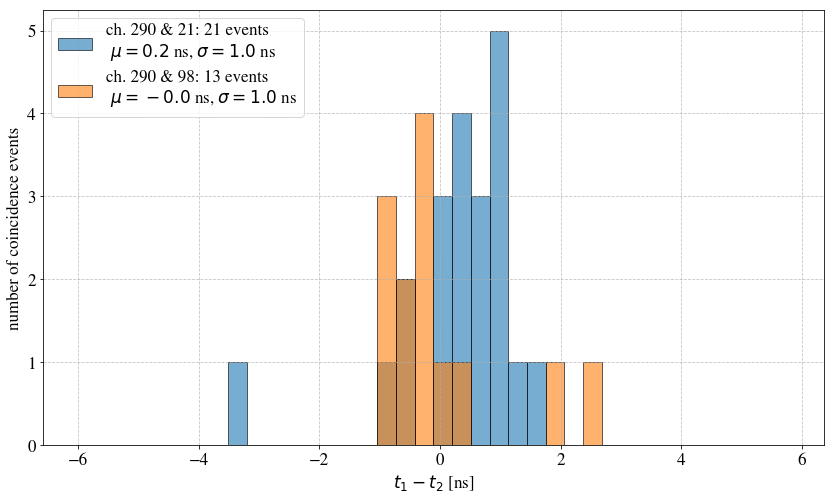

In [100]:
bins = np.arange(-6,6,PETsys_binsize_ns*10);

fig,ax=plt.subplots(figsize=(14,8));

for key in Na22_coinc_pairs.keys():
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.time1-Na22_coinc.time2)*1.e-3;
    mean_dt = np.mean(dt)
    std_dt = np.std(dt)
    plt.hist(dt,bins=bins,
         edgecolor='black',alpha=.6,
         label='ch. %s: %d events\n $\mu=%.1f$ ns, $\sigma=%.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));
    
set_axes(ax=ax,x_label='$t_1 - t_2$ [ns]',y_label='number of coincidence events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='upper left');
save_figure(filename = main_figures_path + 'time_difference_between_SiPMs.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.1/Figures/deposited_charge_ratio_of_two_SiPMs.pdf


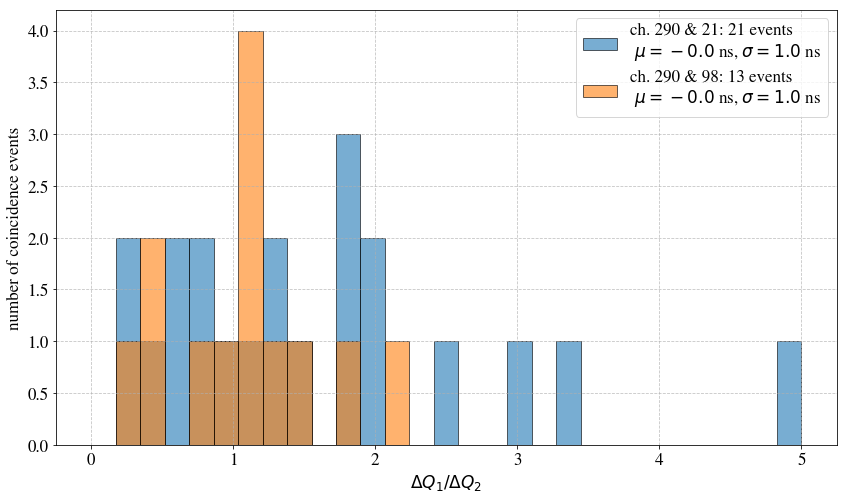

In [110]:
bins = np.linspace(0,5,30);

fig,ax=plt.subplots(figsize=(14,8));

for key in Na22_coinc_pairs.keys():
    Na22_coinc = Na22_coinc_pairs[key];
    e1 = Na22_coinc.e1;
    e2 = Na22_coinc.e2;    
    R = e1/e2;
    plt.hist(R,bins=bins,
         edgecolor='black',alpha=.6,
         label='ch. %s: %d events\n $\mu=%.1f$ ns, $\sigma=%.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));    


set_axes(ax=ax,x_label='$\Delta Q_1/\Delta Q_2$',y_label='number of coincidence events',fontsize=17,do_add_grid=True,
         do_add_legend=True,legend_loc='best');

save_figure(filename = main_figures_path + 'deposited_charge_ratio_of_two_SiPMs.pdf')

#     plt.hist(e1,bins=bins,
#          edgecolor='black',alpha=.6,
#          label='ch. %s: %d events\n $\mu=%.1f$ ns, $\sigma=%.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));
#     plt.hist(e2,bins=bins,
#          edgecolor='black',alpha=.6,
#          label='ch. %s: %d events\n $\mu=%.1f$ ns, $\sigma=%.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));    


## P 1.2

In [111]:
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.2/Figures/'

In [154]:
# Na22 was measured twice

Na22_dT_sec_1 = 2000;
Na22_filename_1 = main_data_path + 'Prototype1.2/Na22_source/'+ 'Na22_29092020_1400_%dsec_1_coinc.dat'%Na22_dT_sec_1
Na22_1 = pd.read_csv(Na22_filename_1)

Na22_dT_sec_2 = 2000;
Na22_filename_2 = main_data_path + 'Prototype1.2/Na22_source/'+ 'Na22_29092020_1400_%dsec_2_coinc.dat'%Na22_dT_sec_2
Na22_2 = pd.read_csv(Na22_filename_2)

Na22 = pd.concat([Na22_1,Na22_2])
Na22[0:3]

,mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2
0,1,0,19673726798773,10.951847,354,1,0,19673726798303,19.595894,226
1,1,0,24332331092310,2.435959,277,1,0,24332331091682,17.077026,149
2,1,0,32312850956229,4.179859,354,1,0,32312850948575,19.020111,98


In [155]:
# Seperate SiPM pairs
ch_ids1 = np.unique(Na22.id1)
ch_ids2 = np.unique(Na22.id2)
print 'detected events in the following channels:'
print 'id1:',ch_ids1,'id2:',ch_ids2
Na22_coinc_pairs = dict()
for ch1 in ch_ids1:
    for ch2 in ch_ids2:
        Na22_coinc_pairs[('%d & %d'%(ch1,ch2))] = Na22[(Na22.id1==ch1)&(Na22.id2==ch2)]
        
print 'done pairing'
for key in Na22_coinc_pairs.keys():
    print 'channels ',key,':', len(Na22_coinc_pairs[key]), 'events'

detected events in the following channels:
id1: [277 354] id2: [ 21  98 149 226]
done pairing
channels  277 & 98 : 26 events
channels  354 & 149 : 30 events
channels  354 & 21 : 30 events
channels  277 & 21 : 24 events
channels  354 & 98 : 26 events
channels  354 & 226 : 33 events
channels  277 & 149 : 14 events
channels  277 & 226 : 34 events


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.2/Figures/time_difference_between_SiPMs.pdf


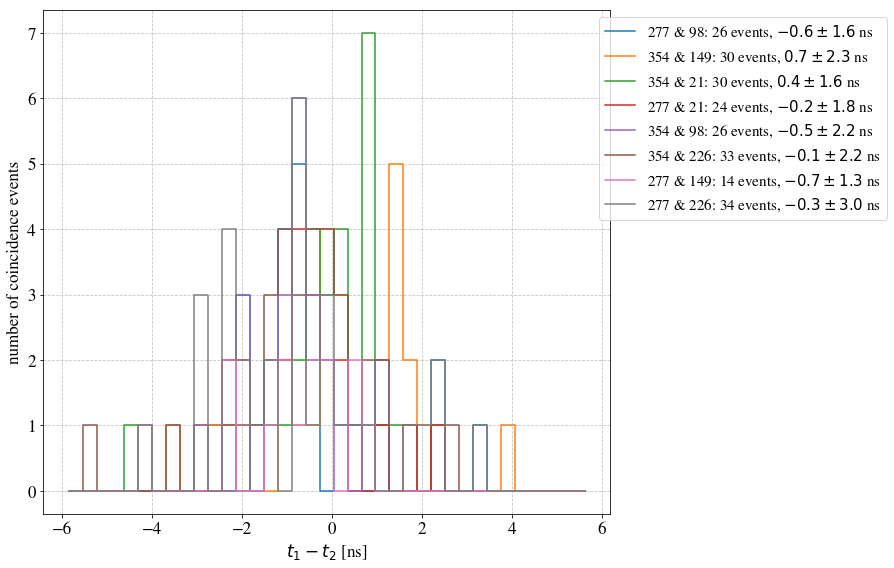

In [156]:
bins = np.arange(-6,6,PETsys_binsize_ns*10);

fig,ax=plt.subplots(figsize=(14,8));

for key in Na22_coinc_pairs.keys():
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.time1-Na22_coinc.time2)*1.e-3;
    mean_dt = np.mean(dt)
    std_dt = np.std(dt)
    histo,edges = np.histogram(dt,bins=bins);
    centers = (edges[1:] + edges[:-1])/2;
    plt.step(centers,histo,
             label='%s: %d events, $%.1f \pm %.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));
#     plt.hist(dt,bins=bins,
#          edgecolor='black',alpha=.6,
#              facecolor='nan',
#          label='%s: %d events, $%.1f \pm %.1f$ ns'%(key,len(Na22_coinc),mean_dt,std_dt));
    
set_axes(ax=ax,x_label='$t_1 - t_2$ [ns]',y_label='number of coincidence events',fontsize=17,do_add_grid=True);

ax.legend(bbox_to_anchor=(1.5,1),fontsize=15,loc='best')
plt.tight_layout()
save_figure(filename = main_figures_path + 'time_difference_between_SiPMs.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.2/Figures/dt_vs_RdeltaQ.pdf


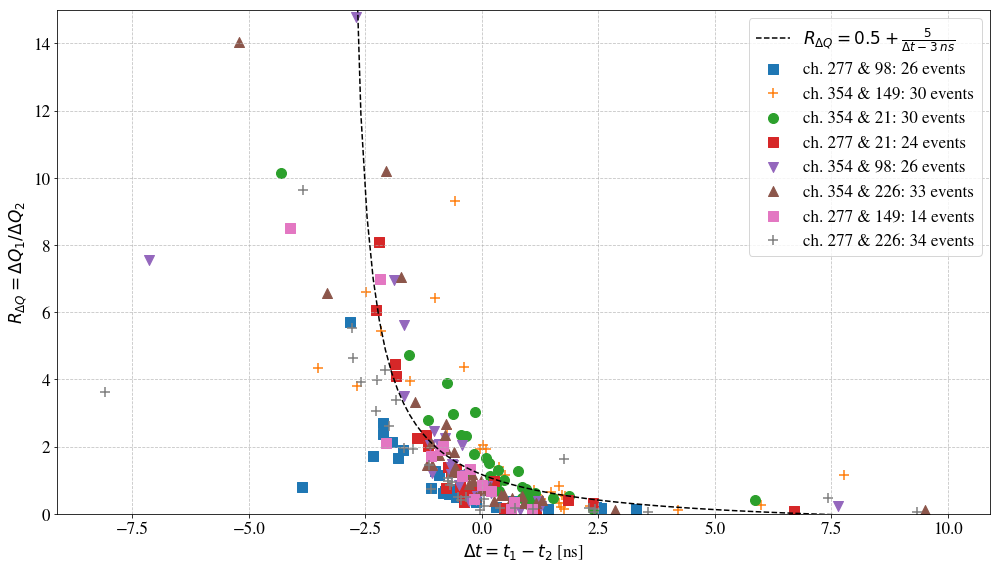

In [202]:
fig,ax=plt.subplots(figsize=(14,8));

markers = [',','+','o','s','v','^',',','+']
for key,marker in zip(Na22_coinc_pairs.keys(),markers):
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.time1-Na22_coinc.time2)*1.e-3;
    mean_dt = np.mean(dt)
    std_dt = np.std(dt)    
    # deposited charge ratio
    e1 = Na22_coinc.e1;
    e2 = Na22_coinc.e2;    
    R = e1/e2;    
    plt.scatter(dt,R,marker=marker,s=100,
             label='ch. %s: %d events'%(key,len(Na22_coinc)));

    
# trend line
x0 = -3
x = np.linspace(x0+0.01,10,100)
y = 5/(x-x0)-0.5;
plt.plot(x,y,'--k',label='$R_{\Delta Q} = 0.5 + \\frac{5}{\Delta t-%d \; ns}$'%np.abs(x0))
    
set_axes(ax=ax,x_label='$\Delta t = t_1 - t_2$ [ns]',y_label='$R_{\Delta Q} = \Delta Q_1/\Delta Q_2$',ylim=(0,15),
         fontsize=17,do_add_grid=True,do_add_legend=True);

plt.tight_layout()
save_figure(filename = main_figures_path + 'dt_vs_RdeltaQ.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.2/Figures/DeltaQ.pdf


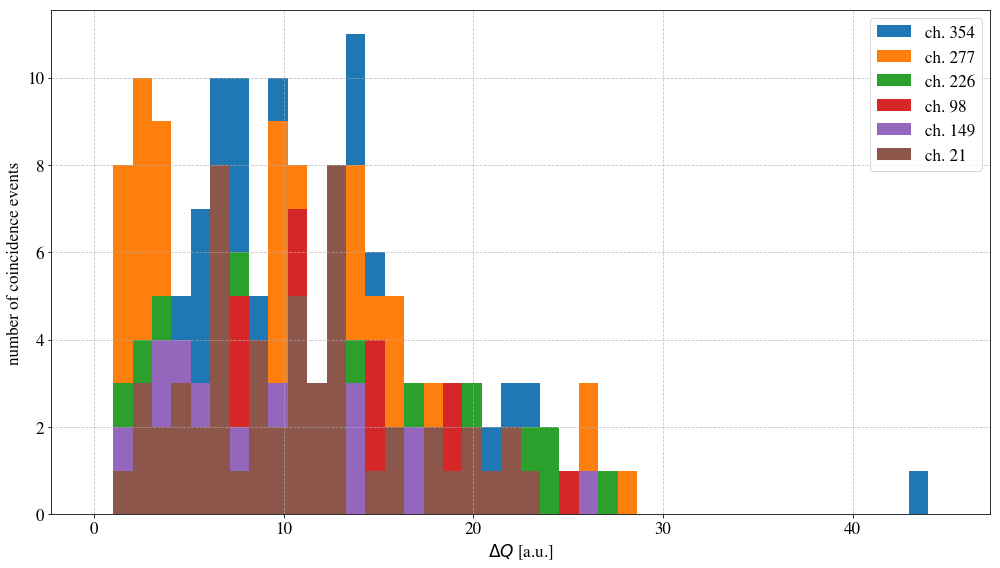

In [235]:
fig,ax=plt.subplots(figsize=(14,8));

bins = np.linspace(0,45,45)
e1_dict = dict()
e2_dict = dict()
for key in Na22_coinc_pairs.keys():
    Na22_coinc = Na22_coinc_pairs[key];
    # deposited charge ratio
    e1 = Na22_coinc.e1;
    ch1 = int(key.split(' ')[0])
    if ch1 not in e1_dict.keys():
        e1_dict[ch1] = linearisedQ e1;
    else:
        e1_dict[ch1] = np.concatenate( [e1_dict[ch1], e1] )

    e2 = Na22_coinc.e2;    
    ch2 = int(key.split(' ')[2])

    if ch2 not in e2_dict.keys():
        e2_dict[ch2] = e2;
    else:
        e2_dict[ch2] = np.concatenate( [e2_dict[ch2], e2] )

for ch1 in e1_dict.keys():            
    plt.hist(e1_dict[ch1],bins=bins,stacked=True,label='ch. %d'%(ch1))

for ch2 in e2_dict.keys():            
    plt.hist(e2_dict[ch2],bins=bins,stacked=True,label='ch. %d'%(ch2))


set_axes(ax=ax,x_label='$\Delta Q$ [a.u.]',y_label='number of coincidence events',
         fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()
save_figure(filename = main_figures_path + 'DeltaQ.pdf')

In [221]:
# int(key[0:3]),int(key[-4:])
int(key.split(' ')[0])

'277'

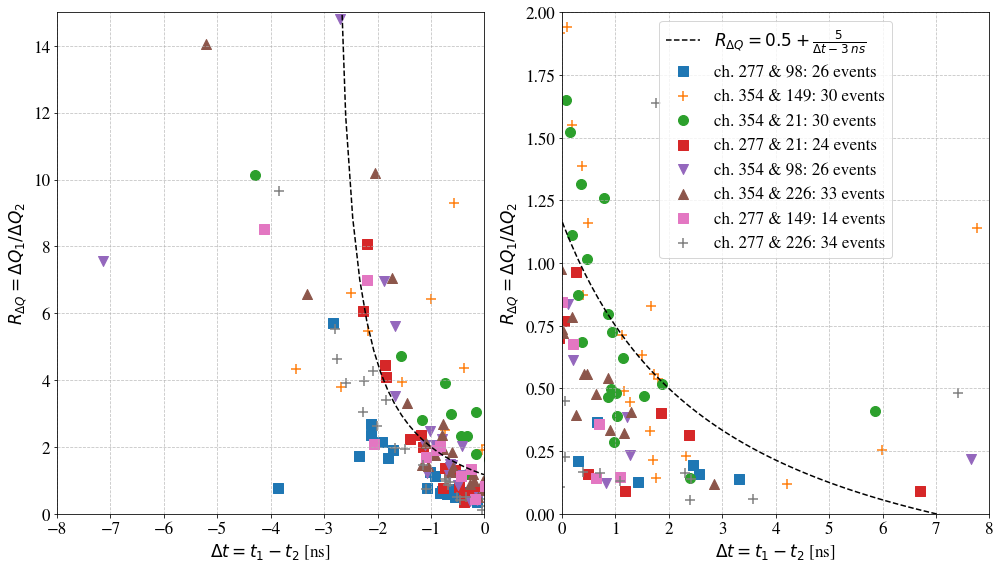

In [207]:
fig=plt.figure(figsize=(14,8));
ax = fig.add_subplot(1,2,1)
markers = [',','+','o','s','v','^',',','+']
for key,marker in zip(Na22_coinc_pairs.keys(),markers):
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.time1-Na22_coinc.time2)*1.e-3;
    mean_dt = np.mean(dt)
    std_dt = np.std(dt)    
    # deposited charge ratio
    e1 = Na22_coinc.e1;
    e2 = Na22_coinc.e2;    
    R = e1/e2;    
    plt.scatter(dt,R,marker=marker,s=100,
             label='ch. %s: %d events'%(key,len(Na22_coinc)));

    
# trend line
x0 = -3
x = np.linspace(x0+0.01,10,100)
y = 5/(x-x0)-0.5;
plt.plot(x,y,'--k',label='$R_{\Delta Q} = 0.5 + \\frac{5}{\Delta t-%d \; ns}$'%np.abs(x0))
    
set_axes(ax=ax,x_label='$\Delta t = t_1 - t_2$ [ns]',y_label='$R_{\Delta Q} = \Delta Q_1/\Delta Q_2$',
         xlim=(-8,0),ylim=(0,15),
         fontsize=17,do_add_grid=True);


ax = fig.add_subplot(1,2,2)
markers = [',','+','o','s','v','^',',','+']
for key,marker in zip(Na22_coinc_pairs.keys(),markers):
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.time1-Na22_coinc.time2)*1.e-3;
    mean_dt = np.mean(dt)
    std_dt = np.std(dt)    
    # deposited charge ratio
    e1 = Na22_coinc.e1;
    e2 = Na22_coinc.e2;    
    R = e1/e2;    
    plt.scatter(dt,R,marker=marker,s=100,
             label='ch. %s: %d events'%(key,len(Na22_coinc)));

    
# trend line
x0 = -3
x = np.linspace(x0+0.01,10,100)
y = 5/(x-x0)-0.5;
plt.plot(x,y,'--k',label='$R_{\Delta Q} = 0.5 + \\frac{5}{\Delta t-%d \; ns}$'%np.abs(x0))
    
set_axes(ax=ax,x_label='$\Delta t = t_1 - t_2$ [ns]',y_label='$R_{\Delta Q} = \Delta Q_1/\Delta Q_2$',
         xlim=(0,8),ylim=(0,2),
         fontsize=17,do_add_grid=True,do_add_legend=True);


plt.tight_layout()

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.2/Figures/Energy.pdf


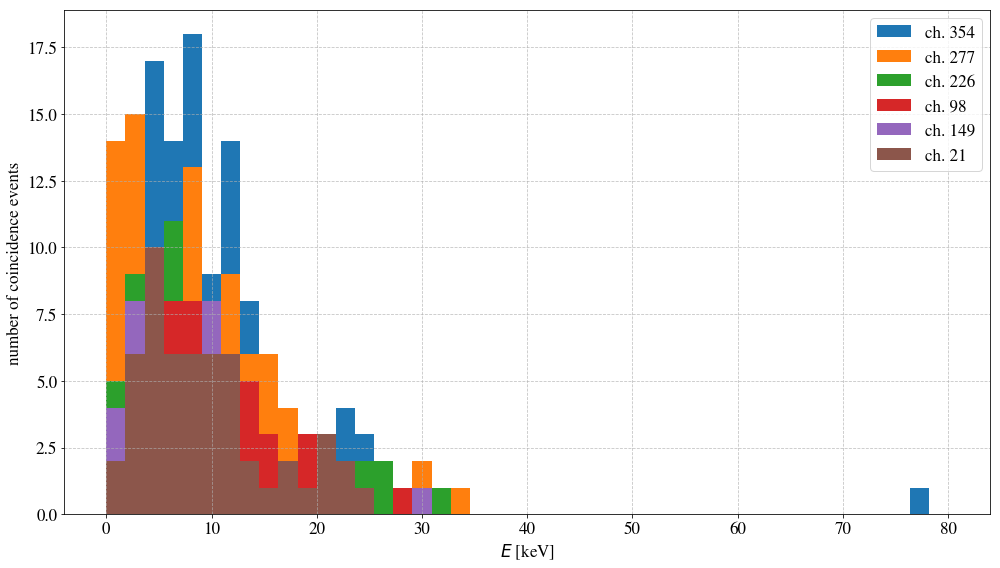

In [256]:
fig,ax=plt.subplots(figsize=(14,8));

bins = np.linspace(0,80,45)
E1_dict = dict()
E2_dict = dict()
for key in Na22_coinc_pairs.keys():
    Na22_coinc = Na22_coinc_pairs[key];
    # deposited charge ratio
    E1 = convert_Charge_to_Energy(Na22_coinc.e1);
    ch1 = int(key.split(' ')[0])
    if ch1 not in E1_dict.keys():
        E1_dict[ch1] = E1;
    else:
        E1_dict[ch1] = np.concatenate( [E1_dict[ch1], E1] )

    E2 = convert_Charge_to_Energy(Na22_coinc.e2);
    ch2 = int(key.split(' ')[2])

    if ch2 not in E2_dict.keys():
        E2_dict[ch2] = E2;
    else:
        E2_dict[ch2] = np.concatenate( [E2_dict[ch2], E2] )

for ch1 in E1_dict.keys():            
    plt.hist(E1_dict[ch1],bins=bins,stacked=True,label='ch. %d'%(ch1))

for ch2 in E2_dict.keys():            
    plt.hist(E2_dict[ch2],bins=bins,stacked=True,label='ch. %d'%(ch2))


set_axes(ax=ax,x_label='$E$ [keV]',y_label='number of coincidence events',
         fontsize=17,do_add_grid=True,do_add_legend=True);
plt.tight_layout()
save_figure(filename = main_figures_path + 'Energy.pdf')

In [254]:
E1_dict

{277: array([ 3.3758579 , 14.60567451, 33.6824637 ,  1.91630345,  5.14927484,
         1.16321989,  1.51649506, 12.44188245,  8.16548081,  7.88692944,
         1.54631802,  2.76325034,  4.82260759,  5.70787585,  6.26035438,
         5.5425343 ,  7.83768179, 16.22473089, 15.79693183,  9.15390203,
        16.8463932 ,  8.32186549, 14.63909226,  7.10987731,  6.00893713,
         8.36931434,  3.84683513, 21.40584126, 12.55843179,  9.42269383,
         1.43939926, 12.7787538 , 16.99225946, 12.91590623,  6.35132537,
         0.7879378 , 12.9763328 ,  4.47030754, 13.65921901,  7.96592662,
        12.59591235, 12.39280242, 17.93315635,  4.18226199,  2.6175664 ,
         9.09179543,  8.51071601,  1.31298768,  2.48161593, 12.33367209,
         1.74389533,  9.88115623, 12.64315036, 14.14482612, 14.71065461,
         9.31748129,  2.80330705, 14.60726738,  2.51602283, 16.69177808,
        12.6137587 , 24.08119743,  3.34617817,  7.64633313,  8.70345146,
         1.76459912,  0.91656059,  1.78939324,